--- 1. Loading Data ---
Dataset loaded successfully.

--- 2. Initial Data Inspection ---
Shape of the dataset (rows, columns): (8807, 12)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Missing Values Count:
show_id            0
type               0
title              0
director   

/tmp/ipython-input-123735427.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
/tmp/ipython-input-123735427.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

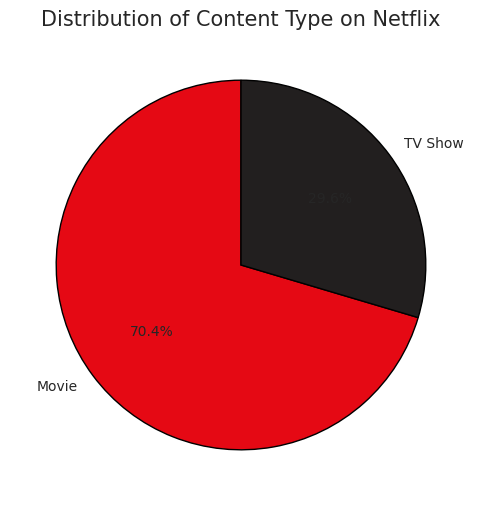


💡 **INSIGHT:** Netflix content is overwhelmingly **Movies**, constituting 70.4% of the total library, while **TV Shows** make up the remaining 29.6%.

--------------------------------------------------
--- 4b. Top 10 Genres (Listed in 'listed_in' column) ---


/tmp/ipython-input-123735427.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='rocket')


International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1327
Documentaries                869
Action & Adventure           859
Independent Movies           756
TV Dramas                    739
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


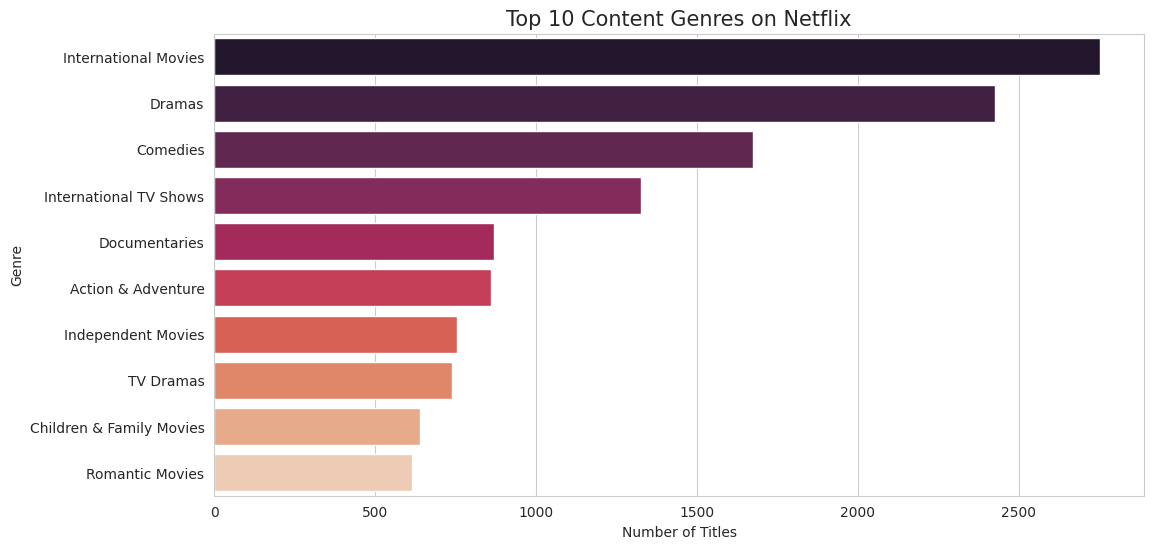


💡 **INSIGHT:** The top 3 genres are **International Movies**, **Dramas**, and **Comedies**. This suggests Netflix focuses heavily on these categories to attract and retain a broad audience.

--------------------------------------------------
--- 4c. Top 10 Countries with Most Content ---
United States     3642
India             1045
United Kingdom     785
Canada             432
France             389
Japan              313
Spain              228
South Korea        226
Germany            225
Mexico             169
Name: count, dtype: int64


/tmp/ipython-input-123735427.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


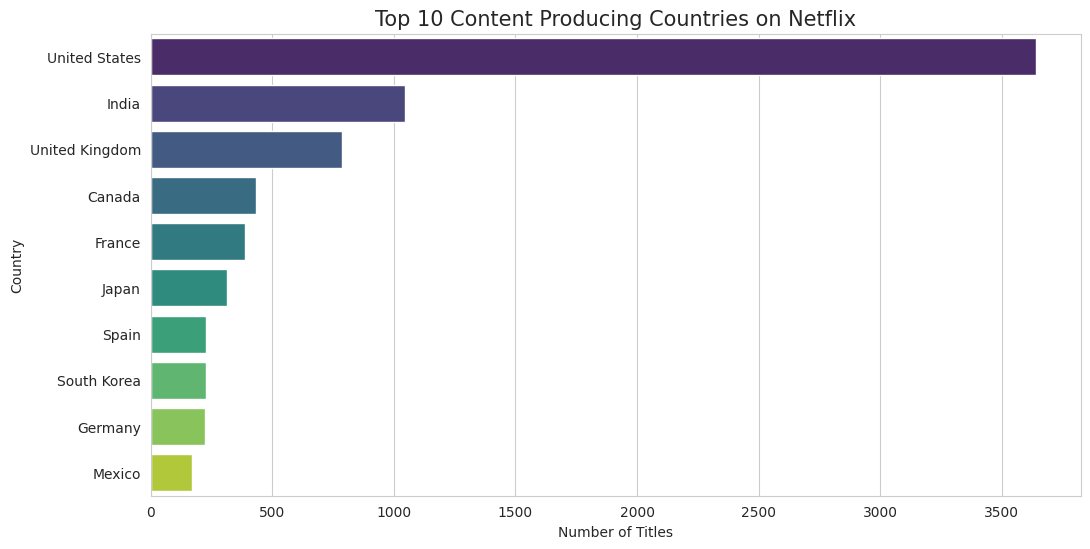


💡 **INSIGHT:** The **United States** is the dominant content provider by a large margin, followed by **India** and **United Kingdom**. This highlights the geographical focus of Netflix's content acquisition/production strategy.

--------------------------------------------------
--- 4d. Year-wise Content Addition Trend (Since 2015) ---
year_added
2015      73
2016     417
2017    1162
2018    1624
2019    1999
2020    1878
2021    1498
Name: count, dtype: int64


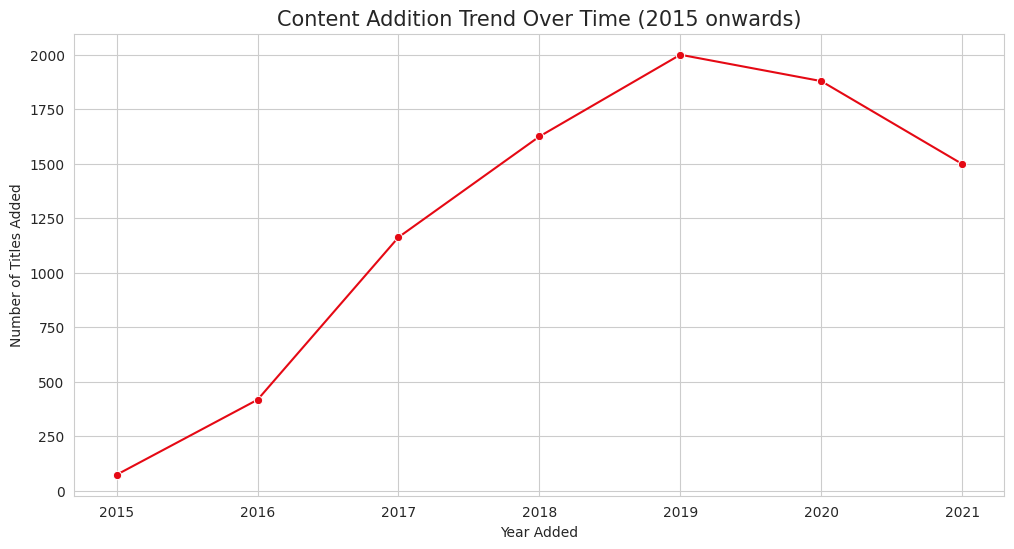


💡 **INSIGHT:** There was a steep and consistent increase in content addition between **2016** and **2019**, suggesting an aggressive content strategy during that period. The drop after **2019/2020** could be due to external factors (like the pandemic affecting production) or a shift in focus from quantity to quality/original content.

--------------------------------------------------

--- 7. Final Conclusion: Summary of Findings ---


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# a style for better visualizations
sns.set_style("whitegrid")

# --- 1. Loading the dataset ---
print("--- 1. Loading Data ---")
try:
    # dataset
    df = pd.read_csv('/content/netflix_titles.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: netflix_titles.csv not found. Please ensure the file is uploaded/in the correct directory.")
    # Create a dummy DataFrame to prevent errors in subsequent cells
    df = pd.DataFrame()
    exit() # Stop execution if the file isn't found

# --- 2. Checking Data Shape, Info, Missing Values ---
print("\n--- 2. Initial Data Inspection ---")
print(f"Shape of the dataset (rows, columns): {df.shape}")
print("\nDataFrame Info:")
df.info()

print("\nMissing Values Count:")
print(df.isnull().sum())

# --- 3. Cleaning Data (Dropping Duplicates, Formatting) ---
print("\n--- 3. Data Cleaning ---")

# a. Drop Duplicates
initial_rows = len(df)
df.drop_duplicates(inplace=True)
duplicates_dropped = initial_rows - len(df)
print(f"Number of duplicate rows dropped: {duplicates_dropped}")

# b. Handle Missing Values (Imputation/Dropping based on context)
# For 'director', 'cast', 'country', 'date_added', and 'rating', we'll fill with 'Unknown' or drop.
# 'director', 'cast', 'country' - Impute with 'Unknown' for EDA
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'].fillna('Unknown', inplace=True) # Cannot impute easily, treating as Unknown
df.dropna(subset=['rating'], inplace=True) # Dropping rows where 'rating' is missing, as it's crucial

# c. Date Formatting and Year Extraction
# Convert 'date_added' to datetime objects and extract the year
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df.dropna(subset=['date_added'], inplace=True) # Drop rows where conversion failed (due to 'Unknown' or invalid format)
df['year_added'] = df['date_added'].dt.year

print(f"Final shape after cleaning: {df.shape}")

# --- 4. Exploratory Data Analysis (EDA) & 5. Plot Visualizations & 6. Generate Insights ---

# Helper function to generate insights
def print_insight(text):
    print(f"\n💡 **INSIGHT:** {text}\n")
    print("-" * 50)

# 4a. Count of Movies vs TV Shows
print("\n--- 4a. Count of Movies vs TV Shows ---")
type_counts = df['type'].value_counts()
print(type_counts)

plt.figure(figsize=(8, 6))
# [Image of a Pie Chart showing the distribution of Movies vs TV Shows on Netflix]

plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['#E50914', '#221f1f'], wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Content Type on Netflix', fontsize=15)
plt.show()

print_insight(f"Netflix content is overwhelmingly **Movies**, constituting {type_counts['Movie']/type_counts.sum()*100:.1f}% of the total library, while **TV Shows** make up the remaining {type_counts['TV Show']/type_counts.sum()*100:.1f}%.")

# 4b. Top 10 Genres (Splitting and Counting)
print("--- 4b. Top 10 Genres (Listed in 'listed_in' column) ---")
# Split the genres, explode the list, and count
genres_split = df['listed_in'].str.split(', ', expand=True).stack()
top_genres = genres_split.value_counts().head(10)
print(top_genres)

plt.figure(figsize=(12, 6))
#
sns.barplot(x=top_genres.values, y=top_genres.index, palette='rocket')
plt.title('Top 10 Content Genres on Netflix', fontsize=15)
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

print_insight(f"The top 3 genres are **{top_genres.index[0]}**, **{top_genres.index[1]}**, and **{top_genres.index[2]}**. This suggests Netflix focuses heavily on these categories to attract and retain a broad audience.")

# 4c. Top 10 Countries with most content (Handling multiple countries)
print("--- 4c. Top 10 Countries with Most Content ---")
# Split the countries, explode the list, and count
country_split = df['country'].str.split(', ', expand=True).stack()
# Exclude 'Unknown' and count the top 10
top_countries = country_split[country_split != 'Unknown'].value_counts().head(10)
print(top_countries)

plt.figure(figsize=(12, 6))
#
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Content Producing Countries on Netflix', fontsize=15)
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

print_insight(f"The **United States** is the dominant content provider by a large margin, followed by **{top_countries.index[1]}** and **{top_countries.index[2]}**. This highlights the geographical focus of Netflix's content acquisition/production strategy.")

# 4d. Year-wise content addition trend (Using 'year_added')
print("--- 4d. Year-wise Content Addition Trend (Since 2015) ---")
# Filter for years after 2014 to focus on the key growth period
addition_trend = df[df['year_added'] >= 2015]['year_added'].value_counts().sort_index()
print(addition_trend)

plt.figure(figsize=(12, 6))
#
sns.lineplot(x=addition_trend.index, y=addition_trend.values, marker='o', color='#E50914')
plt.title('Content Addition Trend Over Time (2015 onwards)', fontsize=15)
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.xticks(addition_trend.index.astype(int)) # Ensure integer ticks
plt.grid(True)
plt.show()

print_insight(f"There was a steep and consistent increase in content addition between **2016** and **2019**, suggesting an aggressive content strategy during that period. The drop after **2019/2020** could be due to external factors (like the pandemic affecting production) or a shift in focus from quantity to quality/original content.")

# --- 7. Final Conclusion ---
print("\n" + "="*60)
print("--- 7. Final Conclusion: Summary of Findings ---")
print("="*60)